In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 模擬資料做SVM

In [33]:
x = np.array([[6, 6], [10, 8], [3, 7], [8, 7]])

In [34]:
x[:, 0]#列出所有行的值

array([ 6, 10,  3,  8])

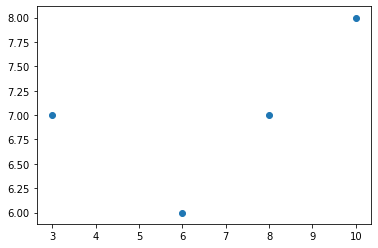

In [35]:
plt.scatter(x[:, 0], x[:, 1])

In [36]:
y = np.array([1, 2, 1, 2])

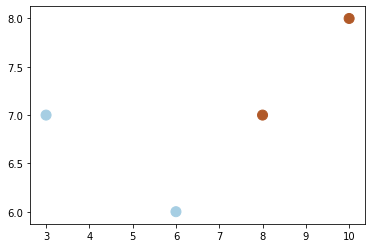

In [37]:
plt.scatter(x[:, 0], x[:, 1], c = y, cmap = 'Paired', s = 100)

### STEP 1 開啟函數學習機

In [38]:
from sklearn.svm import SVC

In [39]:
clf = SVC(gamma = 'auto') #gamma為了讓下面不要有warning

### STEP 2 學習

In [40]:
clf.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### STEP 3 預測

In [41]:
y_predict = clf.predict(x)

In [42]:
y_predict

array([1, 2, 1, 2])

In [43]:
y

array([1, 2, 1, 2])

### 隨機灑點測試預測是否正確

In [44]:
xr = np.random.rand(100)*7 + 3
yr = np.random.rand(100)*2 + 6
#為了讓x界在3~10之間；y界在

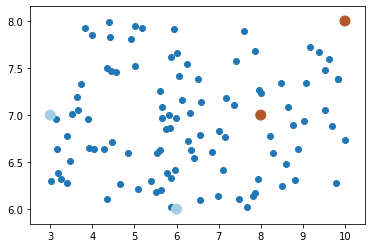

In [45]:
plt.scatter(xr, yr)
plt.scatter(x[:, 0], x[:, 1], c = y, cmap = 'Paired', s = 100)


In [46]:
print('X', xr[: 5])
print('Y', yr[: 5])

X [4.46075243 8.50995537 4.5592356  7.14879636 8.87930116]
Y [6.71732284 6.24588094 7.45316251 6.76447035 6.64050391]


#### 資料整理

原本資料形式:
$$x_r = [x_1, x_2, x_3, ...]$$
$$y_r = [y_1, y_2, y_3, ...]$$

希望整理成:
$$[[x_1, y_1], [x_2, y_2], [x_3, y_3], ...]$$

可以運用np.c_[xr, yr]完成

In [47]:
X = np.c_[xr, yr] #合併xr&yr以進行預測

In [48]:
Y = clf.predict(X)

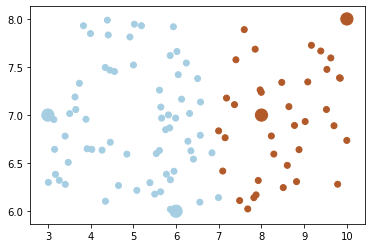

In [50]:
plt.scatter(x[:, 0], x[:, 1], c = y, cmap = 'Paired', s = 150)
plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = 'Paired')

### 結果呈現

In [52]:
x_list = np.linspace(3, 10, 50) #3跟10是界定範圍，50是要找50個點
y_list = np.linspace(6, 8, 50)
X, Y = np.meshgrid(x_list, y_list)

P = np.c_[X.ravel(), Y.ravel()]
C = clf.predict(P)

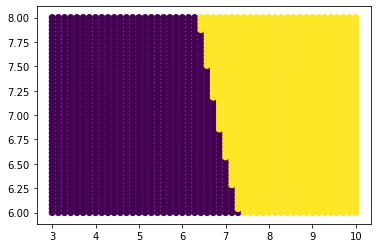

In [53]:
plt.scatter(P[:, 0], P[:, 1], c = C)

### 繪製等高線 contour

In [54]:
xL = np.array([1, 2, 3, 4])
yL = np.array([5, 6, 7, 8])
X, Y = np.meshgrid(xL, yL)

In [56]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [57]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

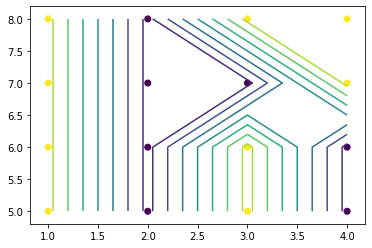

In [63]:
Z = np.random.randint(1, 3, (4, 4))
plt.contour(X, Y, Z)
plt.scatter(X.ravel(), Y.ravel(), c = Z.ravel())

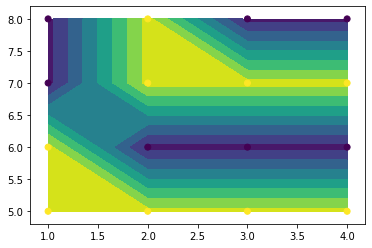

In [65]:
Z = np.random.randint(1, 3, (4, 4))
plt.contourf(X, Y, Z)
plt.scatter(X.ravel(), Y.ravel(), c = Z.ravel()) #因為XYZ是矩陣，畫圖前要用ravel拉平

### 資料視覺化

In [67]:
x_arr = np.arange(3, 10, 0.02)
y_arr = np.arange(6, 8, 0.02)
X, Y = np.meshgrid(x_arr, y_arr)

In [68]:
P = np.c_[X.ravel(), Y.ravel()]

In [70]:
z = clf.predict(P)

In [71]:
Z = z.reshape(X.shape)

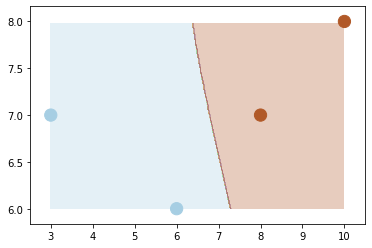

In [73]:
plt.contourf(X, Y, Z, cmap = 'Paired', alpha = 0.3)
plt.scatter(x[:, 0], x[:, 1], c = y, cmap = 'Paired', s = 150)

## 鳶尾花分類 SVM實作

In [74]:
from sklearn.datasets import load_iris

In [75]:
iris = load_iris()

In [76]:
x = iris.data
y = iris.target

In [77]:
x[: 5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [78]:
y[: 5]

array([0, 0, 0, 0, 0])

In [80]:
X = x[:, :2] #只取前兩欄資料

In [81]:
Y = y

### 區分訓練資料/測試資料

In [82]:
from sklearn.model_selection import train_test_split

In [84]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size = 0.2,
                                                   random_state = 0)

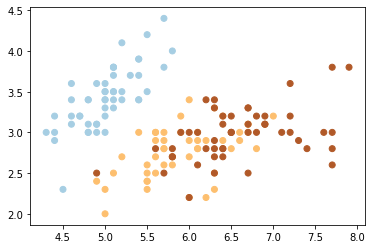

In [85]:
plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = 'Paired')

### STEP 1 函數學習機

In [86]:
clf = SVC(gamma = 'auto')

### STEP 2 訓練

In [87]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### STEP 3 預測

In [88]:
y_predict = clf.predict(x_test)

In [89]:
y_predict

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [90]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [91]:
y_predict - y_test

array([-1,  0,  0,  0,  0,  0,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0])

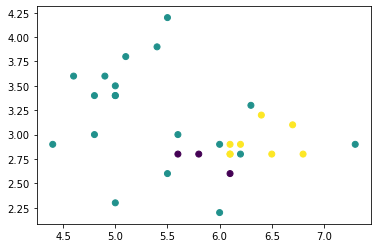

In [92]:
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_predict - y_test)

In [93]:
x0 = np.arange(3.8, 8.2, 0.02)
y0 = np.arange(1.8, 4.7, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]

In [94]:
z = clf.predict(P)

In [95]:
Z = z.reshape(xm.shape)

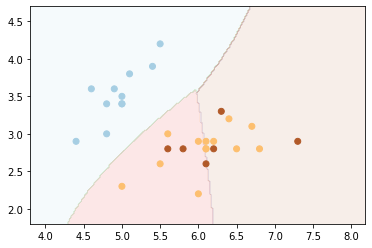

In [102]:
plt.contourf(xm, ym, Z, cmap = 'Paired', alpha = 0.1)
plt.scatter(x_test[:, 0], x_test[:, 1], cmap = 'Paired', c = y_test)